# Objetivo
Verificar o efeito de balancear ou não quando há uma dataset desbalanceado.
Para verificar, vamos usar duas funções do sklearn:
* Smote: Balanceia o dataset pelo método de oversampling (cria variáveis até possuirem o mesmo tamanho).
* NearMiss: Balanceia o dataset pelo método de undersampling (retira variáveis até possuirem o mesmo tamanho).

# Importando as bibliotecas e o dataset

In [1]:
# Bibliotecas de manipulção e visualização de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas para modelos de machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# Importando o dataset
arquivo = pd.read_csv('winequality-red.csv')
arquivo.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Tratamento e exploração dos dados

### Visualizando o tamanho do dataset

In [3]:
arquivo.shape

(1599, 12)

### Renomeando as colunas

In [4]:
arquivo.columns = ['acidez_fixa', 'acidez_volatil', 'acido_citrico', 'acucar_residual', 
                   'cloretos', 'dioxido_de_enxofre livre', 'dióxido_de_enxofre_total', 
                   'densidade', 'pH', 'sulfatos', 'alcool', 'qualidade']

### Visualizando um resumo estatístico sobre o dataset

In [5]:
arquivo.describe().T

,count,mean,std,min,25%,50%,75%,max
acidez_fixa,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
acidez_volatil,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
acido_citrico,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
acucar_residual,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
cloretos,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
dioxido_de_enxofre livre,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
dióxido_de_enxofre_total,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
densidade,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulfatos,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


### Visualizando se há valores ausentes no dataset

In [6]:
arquivo.isnull().sum()

acidez_fixa                 0
acidez_volatil              0
acido_citrico               0
acucar_residual             0
cloretos                    0
dioxido_de_enxofre livre    0
dióxido_de_enxofre_total    0
densidade                   0
pH                          0
sulfatos                    0
alcool                      0
qualidade                   0
dtype: int64

# Visualizando o histograma de cada coluna
Dessa forma, conseguimos compreender melhor nossas variáveis

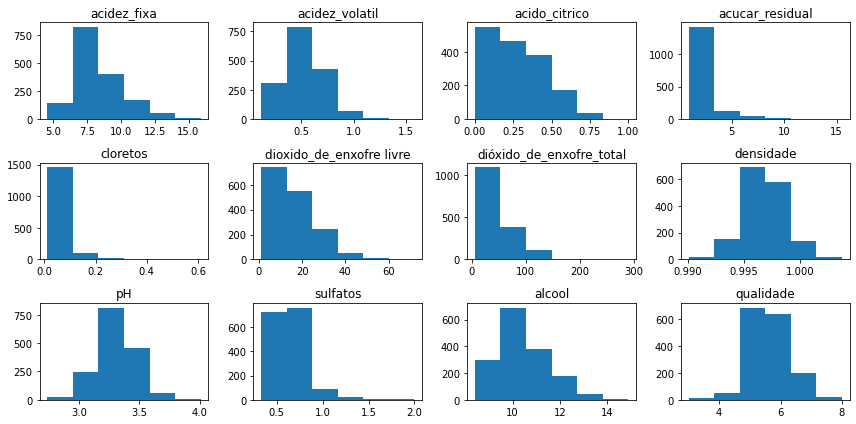

In [7]:
# Criando um subplot com 3 linhas e 4 colunas
f, ax = plt.subplots(3, 4, figsize=(12,6))

colunas = list(arquivo.columns)

for i in range(3):
    for a in range(4):
        ax[i,a].hist(arquivo[colunas[0]], bins = 6)
        ax[i,a].set_title(colunas[0])
        del(colunas[0])

plt.tight_layout()
plt.show()

### Caso tenha linhas duplicas, vamos removê-las

In [8]:
arquivo.drop_duplicates()
print(arquivo.shape)

(1599, 12)


### Mudando a classificação dos vinhos
Vinhos classificados como bons possuem nota >= 7 e vinhos classificados como ruins possuem notas < 7

In [9]:
arquivo['qualidade'].replace([x for x in range(7)], 0, inplace = True)
arquivo['qualidade'].replace([x for x in range(7, 11)], 1, inplace = True)

### Separando as variáveis

In [10]:
X = arquivo.drop('qualidade', axis = 1)
y = arquivo['qualidade']

### Normalizando a variável X
Como visto pelos histogramas, as variáveis possuem proporções numéricas bem distintas.

In [11]:
normalizador = StandardScaler()
X_norm = normalizador.fit_transform(X)

### Visualizando o balanceamento do dataset

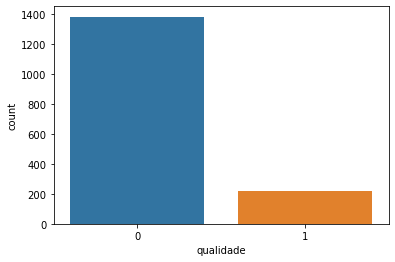

In [12]:
sns.countplot(x = y);

# Criando o modelo preditivo (sem balancear)

### Separando as variáveis em treino e teste

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.3, random_state = 123)

### Criando o modelo

In [14]:
modelo = DecisionTreeClassifier(random_state = 123)

### Treinando a máquina para fazer predições

In [15]:
modelo.fit(X_train, y_train)
acr = round(modelo.score(X_test, y_test)*100, 2)
print(f'Acurácia é de: {acr}%.')

Acurácia é de: 86.25%.


### Prevendo os valores de teste

In [16]:
y_prev = modelo.predict(X_test)

### Matriz de confusão

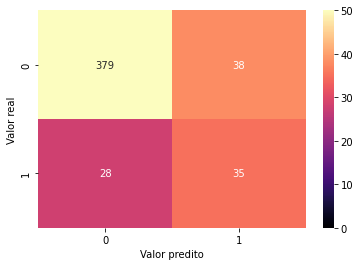

In [17]:
matriz = confusion_matrix(y_test, y_prev)

sns.heatmap(matriz, vmin = 0, vmax = 50, annot = True, cmap = 'magma', fmt='.5g');
plt.ylabel('Valor real')
plt.xlabel('Valor predito');

In [18]:
metricas = classification_report(y_test, y_prev)

# Criando o modelo preditivo (balanceando)
* Utilizando o método de oversampling

### Balanceando a variável y

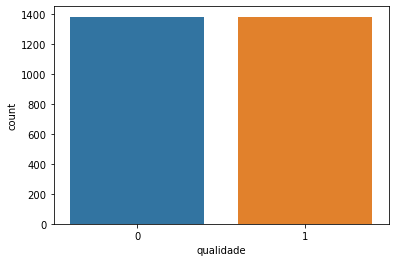

In [19]:
smt = SMOTE()
X_over, y_over = smt.fit_resample(X_norm, y)
sns.countplot(x = y_over);

### Separando as variáveis em treino e teste

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, 
                                                    test_size = 0.3, random_state = 123)

### Criando o modelo

In [21]:
modelo = DecisionTreeClassifier(random_state = 123)

### Treinando o modelo para fazer predições

In [22]:
modelo.fit(X_train, y_train)
acr_over = round(modelo.score(X_test, y_test)*100, 2)
print(f'Acurácia é de: {acr_over}%.')

Acurácia é de: 89.88%.


### Prevendo os valores de teste

In [23]:
y_prev_over = modelo.predict(X_test)

### Matriz de confusão

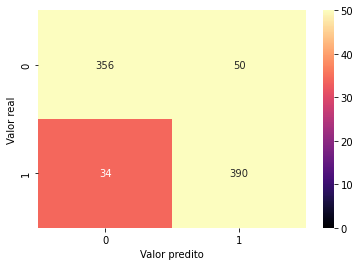

In [24]:
matriz = confusion_matrix(y_test, y_prev_over)

sns.heatmap(matriz, vmin = 0, vmax = 50, annot = True, cmap = 'magma', fmt='.5g');
plt.ylabel('Valor real')
plt.xlabel('Valor predito');

In [25]:
metricas_over = classification_report(y_test, y_prev_over)

* Utilizando o método de undersampling

### Balanceando a variável y

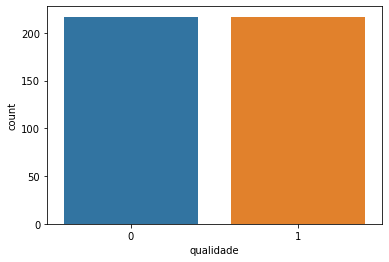

In [26]:
nm = NearMiss(version=1)
X_nm, y_nm = nm.fit_resample(X_norm, y)
sns.countplot(x = y_nm);

### Separando as variáveis em treino e teste

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_nm, y_nm, 
                                                    test_size = 0.3, random_state = 123)

### Criando o modelo

In [28]:
modelo = DecisionTreeClassifier(random_state = 123)

### Treinando o modelo para fazer predições

In [29]:
modelo.fit(X_train, y_train)
acr_under = round(modelo.score(X_test, y_test)*100, 2)
print(f'Acurácia é de: {acr_under}%.')

Acurácia é de: 72.52%.


### Prevendo os valores de teste

In [30]:
y_prev_under = modelo.predict(X_test)

### Matriz de confusão

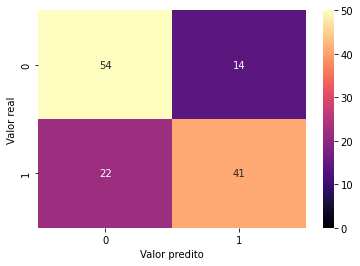

In [31]:
matriz = confusion_matrix(y_test, y_prev_under)

sns.heatmap(matriz, vmin = 0, vmax = 50, annot = True, cmap = 'magma', fmt='.5g');
plt.ylabel('Valor real')
plt.xlabel('Valor predito');

In [32]:
metricas_under = classification_report(y_test, y_prev_under)

### Compando os diferentes resultados

In [33]:
print('Métricas sem balanceamento\n')
print(metricas)
print('------------------------------------------------------')

print('Métricas com balanceamento (Over)\n')
print(metricas_over)
print('------------------------------------------------------')

print('Métricas com balanceamento (Under)\n')
print(metricas_under)

Métricas sem balanceamento

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       417
           1       0.48      0.56      0.51        63

    accuracy                           0.86       480
   macro avg       0.71      0.73      0.72       480
weighted avg       0.87      0.86      0.87       480

------------------------------------------------------
Métricas com balanceamento (Over)

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       406
           1       0.89      0.92      0.90       424

    accuracy                           0.90       830
   macro avg       0.90      0.90      0.90       830
weighted avg       0.90      0.90      0.90       830

------------------------------------------------------
Métricas com balanceamento (Under)

              precision    recall  f1-score   support

           0       0.71      0.79      0.75        68
           1       0.75     

# Conclusão

Comparando as estatísticas, podemos visualizar que a nossa acurácia melhorou com o balanceamento pelo método de oversampling, porém piorou quando usamos o método de undersampling. Isso pode ter ocorrido pois nesse método perdemos grande parte da nossa amostra.

Entretanto, se olharmos somente para as métricas com valores preditos igual a 1, podemos notar um aumento expressivo nos dois métodos. Logo, se o seu objetivo for voltado apenas para os vinhos classificados como bom, mesmo perdendo acurácia pelo método de undersampling, ainda valerá a pena balancear.

Vale ressaltar que a acurácia do modelo sem balanceamento está alta devido a um provável overfitting, pois como nossa base está de balanceada, corremos o risco do nosso modelo prever todos os valores como 0. Portanto, é muito importante se questionar sobre qual é o objetivo de criar esse modelo, para após esse reflexão escolher qual métrica é a melhor a ser analisada.

# Exemplo de um possível case
Digamos que uma adega resolva contratar um cientista de dados, pois pretende realizar um investimento em uma produção de vinhos. Entretanto, o empresário queria comprar apenas modelos que são considerados bons, pois assim irá revender mais rápido.

Diante desse problema, podemos utilizar o modelo criado acima. Mais uma vez, vale a pena ressaltar a importância de balancear os dados, pois dessa forma nosso algoritmo ficou mais robusto para classificar vinhos considerados bons, deste possibilitando uma maior lucrativado para o empresário.